In [3]:
import numpy as np
import scipy.stats as st
import scipy.linalg as sla
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df = pd.read_csv("neo.csv")

In [5]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [8]:
##korelacja
dfcor = pd.DataFrame(df)

correlation = df[['hazardous', 'est_diameter_min', 'est_diameter_max',
                  'relative_velocity', 'miss_distance', 'absolute_magnitude']].corr()

correlation


,hazardous,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
hazardous,1.000000,0.183363,0.183363,0.191185,0.042302,-0.365267
est_diameter_min,0.183363,1.000000,1.000000,0.221553,0.142241,-0.560188
est_diameter_max,0.183363,1.000000,1.000000,0.221553,0.142241,-0.560188
relative_velocity,0.191185,0.221553,0.221553,1.000000,0.327169,-0.353863
miss_distance,0.042302,0.142241,0.142241,0.327169,1.000000,-0.264168
absolute_magnitude,-0.365267,-0.560188,-0.560188,-0.353863,-0.264168,1.000000


In [9]:
columns = ['est_diameter_min','est_diameter_max','relative_velocity','miss_distance',
           'absolute_magnitude']

In [10]:
# Podzial train/test
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['hazardous'])


X_train = train_df[columns[:2:-4]]
y_train = train_df["hazardous"]

X_test = test_df[columns[:2:-4]]
y_test = test_df["hazardous"]

In [11]:
y_train.value_counts()

False    65596
True      7072
Name: hazardous, dtype: int64

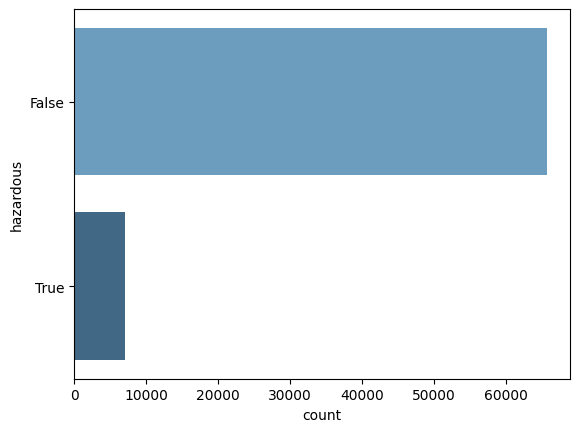

<Figure size 640x480 with 0 Axes>

In [12]:
sns.countplot(y="hazardous", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16149,   251],
       [ 1692,    76]], dtype=int64)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8930537208278292
Precision: 0.2324159021406728
Recall: 0.042986425339366516


In [16]:
## pozostaje dużo false negative przy każdej zmianie rośnie precission i recal ale spada accuracy